LIBRERIAS

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap
import plotly.express as px
from sklearn.neighbors import LocalOutlierFactor
from google.colab import drive
from sklearn.preprocessing import MinMaxScaler

IMPORTACIÓN DE LOS DATOS

En este módulo se va a trabajar con el conjunto de datos Hotel Booking Demand. El conjunto de datos contiene información sobre reservas de hotel realizadas en dos hoteles, uno en ciudad y otro un resort.

Cada fila consiste en una reserva del hotel.
Incluye información sobre cuando fue realizada.
La duración de la estadía.
El número de adultos, niños y bebés entre otras cosas.
Este conjunto de datos es ideal para practicar el análisis exploratorio de los datos y los conceptos de limpieza y calidad de los datos.

En el siguiente enlace puede encontrar información sobre el conjunto de datos y la descripción de cada uno de los atributos: https://www.kaggle.com/jessemostipak/hotel-booking-demand

In [4]:
from google.colab import drive
drive.mount('/content/drive')

csv_path = "/content/drive/MyDrive/hotel_bookings.csv"
df = pd.read_csv(csv_path)
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


CONOCIENDO LOS DATOS

Para comenzar a conocer los datos podemos utilizar dos métodos que nos ayudaran a obtener un vistazo rápido del conjunto de datos, se utilizan los comandos:

- dataframe.shape indica el número de filas y columnas.
- dataframe.info indica el número de filas, columnas y el nombre de las columnas, cuenta el número de nulos y muestra de tipo de dato de cada columna y su cantidad.

In [ ]:
df.shape
df.info()

TIPOS DE DATOS

Exploramos los tipos de datos de cada columna. Así mismo, identificaremos si hay alguna columna que según su significado no coincida con su tipo de dato

Observamos que si hay columnas que según su significado no coincide con su tipo de dato, como por ejemplo, la columna children, presenta como tipo de dato float, sin embargo, debería de ser int. De igual manera con la columna, reservation_status_date, debería de ser datetime64

In [ ]:
df.dtypes

IDENTIFICAR NA

Para identificar los datos faltantes en el conjunto de datos se puede utilizar la función isnull y sumar los valores:

In [ ]:
print(df.isnull().sum())

IDENTIFICAR OUTLIERS

Para identificar datos atípicos se pueden utilizar distintos métodos, Utilicemos un gráfico de box plot para graficar una de las variables.

Observamos que la mayoría de huespedes se quedan hasta cinco noches de fin de semana.

In [ ]:
fig = plt.figure(figsize=(8,8))
sns.boxplot(y=df["stays_in_weekend_nights"])
plt.show()

ANÁLISIS DISTRIBUCIÓN

El análisis de la tendencia central, la simetría y la dispersión de los datos es importante para entender cómo se comporta cada variable

arrival_date_week_number: número de la semana del año en que llega el huesped al hotel.

In [ ]:
df['arrival_date_week_number'].hist(figsize = (6,6))
plt.show

CONTAR DUPLICADOS

Para ver los datos duplicados del conjunto de datos llamamos al método duplicated() en el DataFrame. Si luego llamamos al método SUM, obtendremos el total de duplicados

In [ ]:
df.duplicated().sum()

ANALIZAR VARIBALES CATEGORICAS

Para analizar las variables categóricas, seleccionamos primero el subconjunto del dataframe y visualizamos los valores de cada categoría. Identificamos algún valor que no corresponda con el negocio.

Seleccionar las variables categóricas:

In [5]:
df_cat = df.select_dtypes(include=['object'])
df_cat.head()

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,reservation_status_date
0,Resort Hotel,July,BB,PRT,Direct,Direct,C,C,No Deposit,Transient,Check-Out,2015-07-01
1,Resort Hotel,July,BB,PRT,Direct,Direct,C,C,No Deposit,Transient,Check-Out,2015-07-01
2,Resort Hotel,July,BB,GBR,Direct,Direct,A,C,No Deposit,Transient,Check-Out,2015-07-02
3,Resort Hotel,July,BB,GBR,Corporate,Corporate,A,A,No Deposit,Transient,Check-Out,2015-07-02
4,Resort Hotel,July,BB,GBR,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,2015-07-03


La columna reservation_status_date se muestra como tipo de dato categórico, sin embargo, debería de ser datetime64 más adelante se hará el cambio.

Visualizar los valores de cada una de las variables:

Esto nos ayuda a identificar valores que no coinciden con el dominio del negocio, de ser así, lo eliminaríamos.

In [ ]:
for col in df_cat.columns:
  print(f"{col}: \n{df_cat[col].unique()}\n")

Ahora, utilizando gráficos se observa la proporción entre las distintas categorías.

Gráfico que muestra a la variable si la reserva fue cancelada o no:

In [ ]:
sns.countplot(data=df, x = 'is_canceled')
plt.show()

Inclinación de los clientes por los distintos tipos de habitación:



In [ ]:
sns.countplot(data=df, x = 'reserved_room_type')
plt.show()

Por dónde se realizaron las reservas:



(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'Direct'),
  Text(1, 0, 'Corporate'),
  Text(2, 0, 'Online TA'),
  Text(3, 0, 'Offline TA/TO'),
  Text(4, 0, 'Complementary'),
  Text(5, 0, 'Groups'),
  Text(6, 0, 'Undefined'),
  Text(7, 0, 'Aviation')])

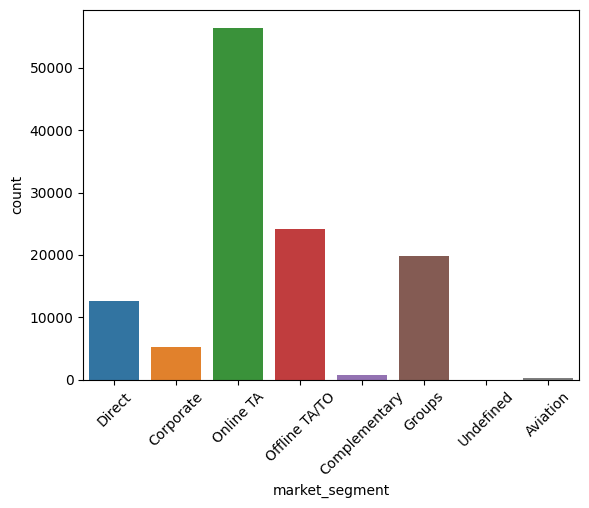

In [6]:
sns.countplot(data=df, x= 'market_segment')
plt.xticks(rotation=45, fontsize=10)

COMBINANDO VARIABLES

Después de analizar las variables de manera individual para comprender su comportamiento, se pueden encontrar relaciones interesantes entres dos, tres o cuatro variables. A continuación se responden algunas preguntas interesantes

¿Qué tipo de hotel tiene el mayor número de cancelaciones?



In [ ]:
sns.countplot(data=df, x = 'hotel', hue='is_canceled')
plt.show()

¿Cuáles son los paises más visitados?



In [ ]:
paises_mas_visitas = df[df['is_canceled'] == 0]['country'].value_counts().reset_index()
paises_mas_visitas.columns = ['country', 'No of guests']
paises_mas_visitas

 ¿Cuánto se paga por una noche de alojamiento?

In [ ]:
# Filtramos las reservas no canceladas
cuanto_se_paga = df[df['is_canceled'] == 0]
plt. figure (figsize= (12,8))

sns.boxplot(x='reserved_room_type', y='adr', data=cuanto_se_paga, hue='hotel')
plt.title('Precio por tipo de habitación por noche', fontsize=16)
plt.xlabel('Tipo de Habitación')
plt.ylabel('Precio en [EUR]')
plt.show()

LIMPIEZA DE DATOS

Vamos a resolver problema de datos faltantes, observemos qué variables tienen datos faltantes y qué se puede hacer en cada caso:

In [ ]:
print(df.isnull().sum())
df[["children", "country", "agent", "company"]].describe(include="all")

La cantidad de datos faltantes en la columna company hace que no sea útil sustituirlos o imputarlos, pues faltan muchos datos y modificarlos supondría una grave alteración de los datos.

La columna agent no está en la misma situación pero no aporta gran valor pues solo es el identificador de los agentes, no el nombre en si.

Por tanto se procede a eliminar esas variables:

In [ ]:
df = df.drop(['company', 'agent'], axis=1)

Para trabajar las columnas country y children una alternativa es eliminar los registros que tienen NA.

Otra alternativa es sustituir la variable con un valor.

Para la columna country que es categórica sería sustituir con la Moda.

El país nás común es PRT (Portugal). Por ello, sustituímos por PRT a los datos faltantes:

In [ ]:
df["country"].replace(np.nan, "PRT", inplace=True)

Para la variable children que es numérica sería necesario analizar su simetría y luego sustituir con su media o mediana,lo sustituímos por 0, porque su mediana es 0.



In [ ]:
df["children"].replace(np.nan, 0, inplace=True)
print(df.isnull().sum())

Por otro lado, la columna children tiene como tipo de dato float, pero debería ser int, entonces procedemos a cambiarle su tipo de dato, lo mismo hacemos para la columna reservation_status_date lo cambiamos de tipo object a DateTime:

In [ ]:
df[["children"]] = df[["children"]].astype("int")
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])

DATOS INCONSISTENTES

Al analizar las caracteristicas de las reservas, en concreto en lo que se refiere a los huéspedes, se puede observar que existen registros que cumplen con la condición de que: (data.children == 0) & (data.adults == 0) & (data.babies == 0)

No puede haber O’s en una misma observación en adults, children y babies (no se puede hacer una reserva sin huéspedes).

Estos registros se deben eliminar:

In [ ]:
filter = (df.children == 0) & (df.adults == 0) & (df.babies == 0)
sum(filter)

In [ ]:
df = df[~filter]
df.shape

OUTLIERS

Se comienza con la detección de outliers visualizando los boxplot de las diferentes variables que conforman nuestro modelo. De su visualización obtenemos un total de 8 variables que presentan cierta problemática: ‘lead time’, ‘stays in weekend nights’, ‘stays in week nights, ‘adults’, “babies’, ‘required car parking spaces’, ‘adr, ‘previous cancellations’.

In [ ]:
columnas = ['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults',
            'babies', 'required_car_parking_spaces', 'adr', 'previous_cancellations']
n = 1
plt.figure(figsize = (20, 15))

for column in columnas:
  plt.subplot(4, 4, n)
  n = n + 2
  sns.boxplot (y=df[column])
  plt.tight_layout()

 Se procede a sustituir la mayoria de los valores atípicos por otros dentro del último cuartil o por el valor cero dependiendo del caso.

In [ ]:
df.loc[df.lead_time > 400, 'lead time'] = 400
df.loc[df.stays_in_weekend_nights >= 5, 'stays_in_weekend_nights'] = 5
df.loc[df.stays_in_week_nights > 20, 'stays_in_week_nights'] = 20
df.loc[df.adults > 10, 'adults'] = 10
df.loc[df.babies > 8, 'babies'] = 0
df.loc[df.required_car_parking_spaces > 5, 'required_car_parking_spaces'] = 0
df.loc[df.adr > 1000, 'adr'] = 1000
df.loc[df.adr < 30, 'adr'] = 0

DUPLICADOS

El anális de datos duplicados en este conjunto es interesante.

Existen muchas filas duplicadas, sin embargo en algunos casos pudieran ser coincidencias de reservas iguales, para clientes diferentes.

En este caso es mejor indagar un poco en el negocio para saber cual es realmente la posibilidad de reservas identicas.

En último recursos, si se eliminan todos los duplicados, quedarían aún suficientes datos para realizar un análisis interesante.

In [ ]:
#Contando los duplicados de todo el dataframe:
df.duplicated().sum()

#Permite ver las filas duplicadas de todo el dataframe
df.loc[df.duplicated(), :]

#Si se quisiera eliminar los duplicados
df_drop = df.drop_duplicates()
df_drop.shape

TRANSFORMAR DATOS

Las transformaciones que se van a aplicar a continuación dependen de la técnica analitica a aplicar. No siempre es necesario aplicarlas todas. En este notebook se aplicarán todas a manera de ejemplo.

Es importante tener claras las necesidades de cada técnica para aplicar lo más adecuado.

La normalización o escalamiento es necesario para poner todas las variables numéricas en la misma escala.



In [ ]:
df_normalize = df.copy()
scaler = MinMaxScaler()
df_normalize[['lead_time', 'arrival_date_year', 'arrival_date_day_of_month', 'stays_in_weekend_nights',
              'stays_in_week_nights', 'adr']] = scaler.fit_transform(df_normalize[['lead_time',
              'arrival_date_year', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adr']])

DISCRETIZACION

Para realizar un ejemplo de discretización se utiliza la variable lead_time que significa los días de antelación con la que se realiza una reserva. Primero se visualiza la distribución de la variable:

In [ ]:
fig = plt.figure(figsize=(8,8))
sns.boxplot(y=df["lead_time"])
plt.show()

A continuación se diseñan los grupos (bins) por los cuales se desea discretizar la variable y se realiza la discretización:



In [ ]:
nivelAntelacion = ['Ninguno', '2-3Semanas', '1Mes', '2Meses', '3Meses', 'Mas3Meses']

df['lead_time_binned'] = pd.cut(x = df['lead_time'],
                      bins = [0, 1, 21, 30, 60, 120, 737],
                      labels = nivelAntelacion, include_lowest = True)
df[['lead_time', 'lead_time_binned']].head(10)

Una vez discretizada la variable se visualizan los resultados, se puede observar que la mayor proporción de ejemplos permanecen en la categorias de Mas3Meses. Tambien se analiza cómo se comportan las cancelaciones con respecto a la nueva variable:

In [ ]:
sns.catplot(x="lead_time_binned", kind="count", data=df, height = 6, aspect = 1.5)
plt.show()

NUMERIZACION

El objetivo de numerizar es convertir a número distintas variables que son categóricas, esto puede ser muy necesario para ciertas técnicas que solo funcioan con datos numéricos. A continuación se muestra cómo numerizar distintas variables del conjunto de datos según su tipo y valor.

Las siguientes variables se pueden numerizar 1 a 1, esto significa que podemos sustituir los valores por números:

In [ ]:
# Numerizar 1 a 1
df_cat['hotel'] = df_cat['hotel'].map({'Resort Hotel' : 0, 'City Hotel' : 1})
df_cat['reserved_room_type'] = df_cat['reserved_room_type'].map({'A': 0, 'B': 1,
                        'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'H': 7, 'L': 8})
df_cat.head()

Para las siguientes variables no se puede realizar el mismo proceso, pues son variables Nominales, no tienen un orden natural, y numerizarlas 1 a 1 sería introducir un error grave en los datos y en las salidas de cualquier algoritmo. Hay que numerizar de 1 a N, creando variable dummies:

In [7]:
df_cat = pd.get_dummies(df_cat, columns = ["distribution_channel"])
df_cat = pd.get_dummies(df_cat, columns = ["customer_type"])
df_cat = pd.get_dummies(df_cat, columns = ["deposit_type"])
df_cat.head()

,hotel,arrival_date_month,meal,country,market_segment,reserved_room_type,assigned_room_type,reservation_status,reservation_status_date,distribution_channel_Corporate,...,distribution_channel_GDS,distribution_channel_TA/TO,distribution_channel_Undefined,customer_type_Contract,customer_type_Group,customer_type_Transient,customer_type_Transient-Party,deposit_type_No Deposit,deposit_type_Non Refund,deposit_type_Refundable
0,Resort Hotel,July,BB,PRT,Direct,C,C,Check-Out,2015-07-01,0,...,0,0,0,0,0,1,0,1,0,0
1,Resort Hotel,July,BB,PRT,Direct,C,C,Check-Out,2015-07-01,0,...,0,0,0,0,0,1,0,1,0,0
2,Resort Hotel,July,BB,GBR,Direct,A,C,Check-Out,2015-07-02,0,...,0,0,0,0,0,1,0,1,0,0
3,Resort Hotel,July,BB,GBR,Corporate,A,A,Check-Out,2015-07-02,1,...,0,0,0,0,0,1,0,1,0,0
4,Resort Hotel,July,BB,GBR,Online TA,A,A,Check-Out,2015-07-03,0,...,0,1,0,0,0,1,0,1,0,0


MUESTREO

Si el objetivo fuera predecir la variable is_canceled se deberia analizar el balance de cada una de las clases, a continuación se muestran en un gráficos:

In [ ]:
#Variable sі la reserva fue cancelada o no
sns.countplot(data=df, x = 'is_canceled')
plt.show()

Es evidente que hay más datos de una que de la otra, pudiera aplicarse una técnicas de submuestreo para balancear las clases:

In [ ]:
from sklearn.utils import resample

# Contar las clases:
count_class_No, count_class_Yes = df["is_canceled"].value_counts()

#Dividir los dataframes por las clases:
df_class_No = df[df["is_canceled"] == 0]
df_class_Yes = df[df["is_canceled"] == 1]

#submuestrear la clase mayoritaria No:
no_downsampled = resample(df_class_No,
                      replace=False, # sample without replacement
                      n_samples = count_class_Yes, #Number of samples to generate
                      random_state = 27) #reproducible results
                      #combinar dataframes
df_sample = pd.concat([df_class_Yes, no_downsampled])

In [ ]:
sns.countplot(data=df_sample, x = 'is_canceled')
plt.show()